# Data Storytelling

## ADNI Alzheimer's Data

In [133]:
# import standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta

import eda

# display matplotlib inline
%matplotlib inline

# import wrangle_adni to import/wrangle the data
from adnidatawrangling import wrangle_adni

# set defaults for sns
sns.set()

In [67]:
# import data, clean, and extract data
adni_comp, clin_data, scan_data = wrangle_adni()

In [68]:
adni_comp.shape

(4672, 30)

In [69]:
adni_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4672 entries, 3 to 5292
Data columns (total 30 columns):
PTGENDER              4672 non-null category
DX                    4672 non-null category
DX_bl                 4672 non-null category
EXAMDATE              4672 non-null datetime64[ns]
EXAMDATE_bl           4672 non-null datetime64[ns]
PTEDUCAT              4672 non-null int32
Month                 4672 non-null int32
AGE                   4672 non-null float64
CDRSB                 4672 non-null float64
CDRSB_bl              4672 non-null float64
ADAS11                4672 non-null float64
ADAS11_bl             4672 non-null float64
ADAS13                4672 non-null float64
ADAS13_bl             4672 non-null float64
MMSE                  4672 non-null float64
MMSE_bl               4672 non-null float64
RAVLT_immediate       4672 non-null float64
RAVLT_immediate_bl    4672 non-null float64
Hippocampus           4672 non-null float64
Hippocampus_bl        4672 non-null float64


In [70]:
adni_comp.head()

,PTGENDER,DX,DX_bl,EXAMDATE,EXAMDATE_bl,PTEDUCAT,Month,AGE,CDRSB,CDRSB_bl,...,Ventricles,Ventricles_bl,WholeBrain,WholeBrain_bl,Entorhinal,Entorhinal_bl,MidTemp,MidTemp_bl,AGE_dynamic,DX_bl2
RID,,,,,,,,,,,,,,,,,,,,,
3,Male,AD,AD,2006-09-12,2005-09-12,18,12,81.3,3.5,4.5,...,90099.0,84599.0,1095640.0,1129830.0,1596.0,1791.0,17330.0,18422.0,82.3,AD
3,Male,AD,AD,2005-09-12,2005-09-12,18,0,81.3,4.5,4.5,...,84599.0,84599.0,1129830.0,1129830.0,1791.0,1791.0,18422.0,18422.0,81.3,AD
3,Male,AD,AD,2006-03-13,2005-09-12,18,6,81.3,6.0,4.5,...,88580.0,84599.0,1100060.0,1129830.0,2427.0,1791.0,16972.0,18422.0,81.8,AD
3,Male,AD,AD,2007-09-12,2005-09-12,18,24,81.3,8.0,4.5,...,97420.0,84599.0,1088560.0,1129830.0,1175.0,1791.0,16398.0,18422.0,83.3,AD
4,Male,MCI,LMCI,2008-11-18,2005-11-08,10,36,67.5,1.0,1.0,...,45254.0,39605.0,1085350.0,1154980.0,3052.0,3983.0,18934.0,19615.0,70.5,MCI


## Questions
1. Distribution of different diagnoses for baseline, subsequent exams, and change
2. Cognitive tests distributions for baseline, subsequent exams, and change
3. Scan data change over time
4. Correlations with cognitive tests and brain scans
5. Correlations with cognitive tests and diagnoses
6. Correlations with brain scans and diagnoses
7. Change in biomarkers with change in diagnosis
8. Differences by sex/education
9. Age as a factor
10. Split by diagnosis, sex, education vs. lumping together

In [71]:
# subset only the basline data from the complete dataset

adni_bl = adni_comp[adni_comp.EXAMDATE == adni_comp.EXAMDATE_bl]
clin_bl = clin_data[clin_data.EXAMDATE == clin_data.EXAMDATE_bl]
scan_bl = scan_data[scan_data.EXAMDATE == scan_data.EXAMDATE_bl]

In [72]:
# distribution of baseline diagnoses for complete clinical data

adni_comp_DXbl_counts = adni_bl.groupby('DX_bl')['DX_bl'].count()

In [73]:
adni_comp_DXbl_counts

DX_bl
CN      329
SMC      48
EMCI    224
LMCI    395
AD      174
Name: DX_bl, dtype: int64

In [74]:
# combine SMC + CN, combine EMCI + LMCI
# subjective memory complaints were categorized as cognitively normal
# this was based on literature suggesting SMC is associate with mood vs impairment


#CN_bl = adni_comp_DXbl_counts['CN'] + adni_comp_DXbl_counts['SMC']
#MCI_bl = adni_comp_DXbl_counts['EMCI'] + adni_comp_DXbl_counts['LMCI']
#AD_bl = adni_comp_DXbl_counts['AD']
DX_bl = adni_comp.groupby('RID')['DX_bl'].min()
DX_bl_counts = DX_bl.value_counts()

In [75]:
DX_bl_counts

LMCI    395
CN      329
EMCI    224
AD      174
SMC      48
Name: DX_bl, dtype: int64

Text(0.5, 1.0, 'Baseline Diagnosis')

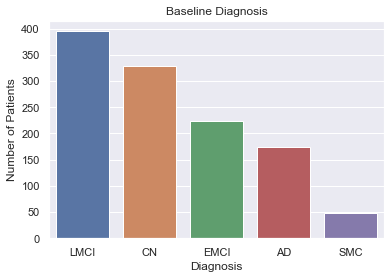

In [76]:
sns.barplot(x=DX_bl_counts.index, y=DX_bl_counts.values)
plt.xlabel('Diagnosis')
plt.ylabel('Number of Patients')
plt.title('Baseline Diagnosis')

In [77]:
# filter the most advanced diagnosis for each patient

dx_final = adni_comp.groupby('RID')['DX'].max()

In [78]:
dx_counts = dx_final.value_counts()

In [79]:
dx_counts

MCI    479
AD     357
CN     334
Name: DX, dtype: int64

Text(0.5, 1.0, 'Final Diagnosis')

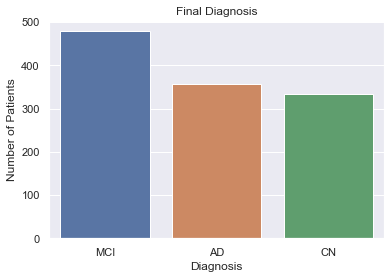

In [80]:
sns.barplot(x=dx_counts.index, y=dx_counts.values)
plt.xlabel('Diagnosis')
plt.ylabel('Number of Patients')
plt.title('Final Diagnosis')

In [81]:
DX_bl2 = adni_comp.groupby('RID')['DX_bl2'].min()
DX_bl2_counts = DX_bl2.value_counts()

In [82]:
DX_bl2_counts

MCI    619
CN     377
AD     174
Name: DX_bl2, dtype: int64

In [83]:
# join baseline and final diagnosis data for comparison

counts = [DX_bl2_counts[1], DX_bl2_counts[0], DX_bl2_counts[2], dx_counts[2], dx_counts[1], dx_counts[0]]


dx_comp = {'visit': ['Baseline', 'Baseline', 'Baseline', 'Final', 'Final', 'Final'], 
           'diagnosis': ['CN', 'MCI', 'AD', 'CN', 'MCI', 'AD'],
          'counts': counts}

In [84]:
dx_comp

{'visit': ['Baseline', 'Baseline', 'Baseline', 'Final', 'Final', 'Final'],
 'diagnosis': ['CN', 'MCI', 'AD', 'CN', 'MCI', 'AD'],
 'counts': [377, 619, 174, 334, 357, 479]}

In [85]:
diag = pd.DataFrame(dx_comp)

In [86]:
diag

,visit,diagnosis,counts
0,Baseline,CN,377
1,Baseline,MCI,619
2,Baseline,AD,174
3,Final,CN,334
4,Final,MCI,357
5,Final,AD,479


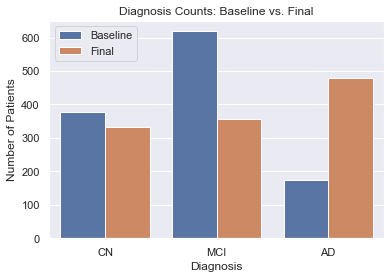

In [87]:
sns.barplot(x='diagnosis', y='counts', hue='visit', data=diag)
plt.xlabel('Diagnosis')
plt.ylabel('Number of Patients')
plt.title('Diagnosis Counts: Baseline vs. Final')
plt.legend(loc='upper left')

In [88]:
# diagnosis change
bl = diag[diag['visit'] == 'Baseline']
final = diag[diag['visit'] == 'Final']

In [89]:
change = final['counts'].values - bl['counts'].values 

Text(0.5, 1.0, 'Change in Diagnosis Counts: Baseline to Final')

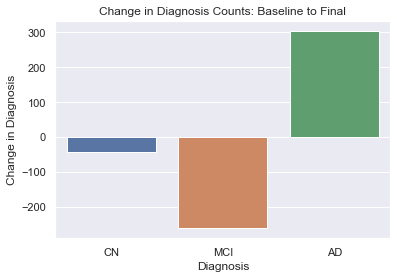

In [90]:
sns.barplot(x=['CN', 'MCI', 'AD'], y=change)
plt.xlabel('Diagnosis')
plt.ylabel('Change in Diagnosis')
plt.title('Change in Diagnosis Counts: Baseline to Final')

In [91]:
adni_comp.head()

,PTGENDER,DX,DX_bl,EXAMDATE,EXAMDATE_bl,PTEDUCAT,Month,AGE,CDRSB,CDRSB_bl,...,Ventricles,Ventricles_bl,WholeBrain,WholeBrain_bl,Entorhinal,Entorhinal_bl,MidTemp,MidTemp_bl,AGE_dynamic,DX_bl2
RID,,,,,,,,,,,,,,,,,,,,,
3,Male,AD,AD,2006-09-12,2005-09-12,18,12,81.3,3.5,4.5,...,90099.0,84599.0,1095640.0,1129830.0,1596.0,1791.0,17330.0,18422.0,82.3,AD
3,Male,AD,AD,2005-09-12,2005-09-12,18,0,81.3,4.5,4.5,...,84599.0,84599.0,1129830.0,1129830.0,1791.0,1791.0,18422.0,18422.0,81.3,AD
3,Male,AD,AD,2006-03-13,2005-09-12,18,6,81.3,6.0,4.5,...,88580.0,84599.0,1100060.0,1129830.0,2427.0,1791.0,16972.0,18422.0,81.8,AD
3,Male,AD,AD,2007-09-12,2005-09-12,18,24,81.3,8.0,4.5,...,97420.0,84599.0,1088560.0,1129830.0,1175.0,1791.0,16398.0,18422.0,83.3,AD
4,Male,MCI,LMCI,2008-11-18,2005-11-08,10,36,67.5,1.0,1.0,...,45254.0,39605.0,1085350.0,1154980.0,3052.0,3983.0,18934.0,19615.0,70.5,MCI


In [92]:
# get last visit info

adni_comp.reset_index(inplace=True)

In [93]:
adni_comp.set_index([adni_comp.RID, adni_comp.EXAMDATE], inplace=True)

In [94]:
RID_list = adni_comp.RID.unique()

In [95]:
RID_list

array([   3,    4,    5, ..., 5289, 5290, 5292], dtype=int64)

In [96]:
adni_comp.drop('RID', axis='columns', inplace=True)

In [97]:
last_exam = adni_comp.groupby('RID')['EXAMDATE'].max()

In [98]:
last_exam[3]

Timestamp('2007-09-12 00:00:00')

In [99]:
data_dict = {}

In [100]:
adni_comp.shape[0]

for i in range(len(RID_list)):
    #list_data.append(adni_comp.loc[(RID_list[i], str(last_exam[RID_list[i]]))])
    data_dict[RID_list[i]] = adni_comp.loc[(RID_list[i], str(last_exam[RID_list[i]]))]

In [101]:
final_exam = pd.DataFrame(data_dict)

In [102]:
final_exam = final_exam.transpose()

In [103]:
final_exam.head()

,PTGENDER,DX,DX_bl,EXAMDATE,EXAMDATE_bl,PTEDUCAT,Month,AGE,CDRSB,CDRSB_bl,...,Ventricles,Ventricles_bl,WholeBrain,WholeBrain_bl,Entorhinal,Entorhinal_bl,MidTemp,MidTemp_bl,AGE_dynamic,DX_bl2
3,Male,AD,AD,2007-09-12 00:00:00,2005-09-12 00:00:00,18,24,81.3,8,4.5,...,97420,84599,1.08856e+06,1.12983e+06,1175,1791,16398,18422,83.3,AD
4,Male,MCI,LMCI,2008-11-18 00:00:00,2005-11-08 00:00:00,10,36,67.5,1,1,...,45254,39605,1.08535e+06,1.15498e+06,3052,3983,18934,19615,70.5,MCI
5,Male,CN,CN,2008-09-10 00:00:00,2005-09-07 00:00:00,16,36,73.7,1,0,...,41656,34062,1.08049e+06,1.11663e+06,3605,4433,20398,21614,76.7,CN
6,Female,MCI,LMCI,2008-12-08 00:00:00,2005-11-29 00:00:00,13,36,80.4,2,0.5,...,46549,39826,924403,927510,2309,2277,17356,17802,83.4,MCI
7,Male,AD,AD,2006-04-13 00:00:00,2005-10-06 00:00:00,10,6,75.4,6,6,...,26810,25704,858947,875798,2294,2050,14459,15374,75.9,AD


In [104]:
final_exam.shape

(1170, 30)

In [105]:
# compare initial diagnosis with final diagnosis

cn_cn = final_exam[(final_exam.DX == 'CN') & (final_exam.DX_bl2 == 'CN')]
cn_mci = final_exam[(final_exam.DX == 'MCI') & (final_exam.DX_bl2 == 'CN')]
cn_ad = final_exam[(final_exam.DX == 'AD') & (final_exam.DX_bl2 == 'CN')]
mci_cn = final_exam[(final_exam.DX == 'CN') & (final_exam.DX_bl2 == 'MCI')]
mci_mci = final_exam[(final_exam.DX == 'MCI') & (final_exam.DX_bl2 == 'MCI')]
mci_ad = final_exam[(final_exam.DX == 'AD') & (final_exam.DX_bl2 == 'MCI')]
ad_cn = final_exam[(final_exam.DX == 'CN') & (final_exam.DX_bl2 == 'AD')]
ad_mci = final_exam[(final_exam.DX == 'MCI') & (final_exam.DX_bl2 == 'AD')]
ad_ad = final_exam[(final_exam.DX == 'AD') & (final_exam.DX_bl2 == 'AD')]

In [106]:
# create a dictionary and convert to a dataframe

diag_dict = {'CN': [cn_cn.shape[0], cn_mci.shape[0], cn_ad.shape[0]], 
             'MCI': [mci_cn.shape[0], mci_mci.shape[0], mci_ad.shape[0]],
             'AD': [ad_cn.shape[0], ad_mci.shape[0], ad_ad.shape[0]]}

diag_df = pd.DataFrame(diag_dict)

In [107]:
diag_df

,CN,MCI,AD
0,335,34,0
1,37,409,2
2,5,176,172


In [108]:
# extract the bar heights

ad_final = [diag_df.loc[:,'CN'].sum(), diag_df.loc[:,'MCI'].sum(), diag_df.loc[:,'AD'].sum()]
mci_final = [diag_df.loc[0:1, 'CN'].sum(), diag_df.loc[0:1, 'MCI'].sum(), diag_df.loc[0:1, 'AD'].sum()]
cn_final = [diag_df.loc[0, 'CN'], diag_df.loc[0, 'MCI'], diag_df.loc[0, 'AD']]

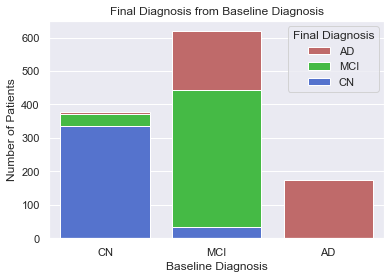

In [109]:
# contruct the plot

sns.barplot(x=['CN', 'MCI', 'AD'], y=ad_final, color='indianred', label='AD')
sns.barplot(x=['CN', 'MCI', 'AD'], y=mci_final, color='limegreen', label='MCI')
sns.barplot(x=['CN', 'MCI', 'AD'], y=cn_final, color='royalblue', label='CN')
plt.xlabel('Baseline Diagnosis')
plt.ylabel('Number of Patients')
plt.title('Final Diagnosis from Baseline Diagnosis')
plt.legend(title='Final Diagnosis')

In [110]:
cn_stayed = final_exam[(final_exam.DX == 'CN') & (final_exam.DX_bl == 'CN')]

In [111]:
# 42 CN GOT WORSE AND 294 STAYED NORMAL

cn_stayed.shape

(294, 30)

In [112]:
cn = final_exam[(final_exam['DX_bl'] == 'CN') | (final_exam['DX_bl'] == 'SMC')]

In [113]:
cn.shape

(377, 30)

In [114]:
cn_gotworse = cn[cn['DX'] != 'CN']

In [115]:
cn_gotworse.shape

(42, 30)

In [116]:
cn_nochange = cn.shape[0] - cn_gotworse.shape[0]

In [117]:
cn_to_mci = cn_gotworse[cn_gotworse['DX'] == 'MCI']
cn_to_ad = cn_gotworse[cn_gotworse['DX'] == 'AD']

Text(0.5, 1.0, 'Final Diagnosis from CN Baseline Patients')

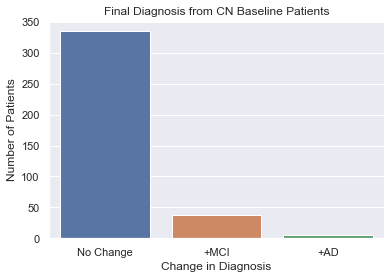

In [118]:
sns.barplot(x=['No Change', '+MCI', '+AD'], y=[cn_nochange, cn_to_mci.shape[0], cn_to_ad.shape[0]])
plt.xlabel('Change in Diagnosis')
plt.ylabel('Number of Patients')
plt.title('Final Diagnosis from CN Baseline Patients')

In [119]:
mci = final_exam[(final_exam['DX_bl'] == 'LMCI') | (final_exam['DX_bl'] == 'EMCI')]

In [120]:
mci_gotworse = mci[mci['DX'] == 'AD']

In [121]:
mci_gotbetter = mci[mci['DX'] == 'CN']

In [122]:
mci.shape

(619, 30)

In [123]:
mci_nochange = mci.shape[0] - mci_gotbetter.shape[0] - mci_gotworse.shape[0]

In [124]:
mci_gotbetter.shape

(34, 30)

Text(0.5, 1.0, 'Final Diagnosis from MCI Baseline Patients')

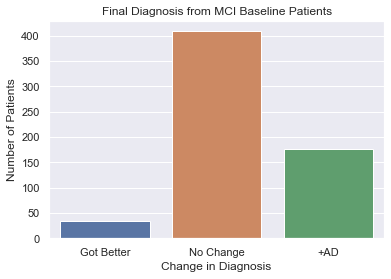

In [125]:
sns.barplot(x=['Got Better', 'No Change', '+AD'], y=[mci_gotbetter.shape[0], mci_nochange, mci_gotworse.shape[0]])
plt.xlabel('Change in Diagnosis')
plt.ylabel('Number of Patients')
plt.title('Final Diagnosis from MCI Baseline Patients')

In [126]:
#clin_bl
#clin_sub

In [127]:
clin_bl.columns

Index(['EXAMDATE', 'EXAMDATE_bl', 'Month', 'PTGENDER', 'DX', 'DX_bl',
       'PTEDUCAT', 'AGE', 'AGE_dynamic', 'CDRSB', 'CDRSB_bl', 'ADAS11',
       'ADAS11_bl', 'ADAS13', 'ADAS13_bl', 'MMSE', 'MMSE_bl',
       'RAVLT_immediate', 'RAVLT_immediate_bl', 'DX_bl2'],
      dtype='object')

Text(0.5, 1.0, 'Clinical Data: Patient Gender')

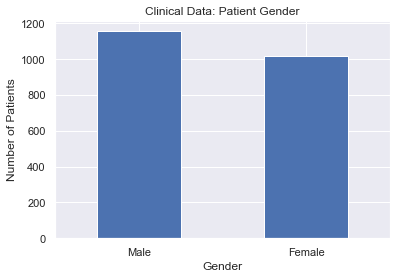

In [128]:
clin_bl['PTGENDER'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('Clinical Data: Patient Gender')

Text(0.5, 1.0, 'Scan Data: Patient Gender')

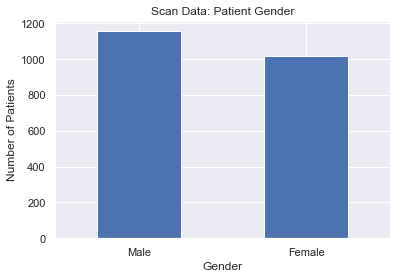

In [129]:
scan_bl['PTGENDER'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('Scan Data: Patient Gender')

In [130]:
# view clinical pairplot to find potential correlations
# figure copy/pasted into image editor to zoom and view more closely

sns.pairplot(clin_sub, hue='DX')

#### Pairplot Notes: Clinical Data
- Education has very little/no correlation with any other factor
- Dynamic_age has very little/no correlation with other factors
- CSRSB correlations
    - ADAS11, ADAS13 +
    - MMSE, RAVLT & RAVLT_bl -
- ADAS11 & ADAS13 tightly + corr
- MMSE & ADAS11/13 - corr


#### Baseline data correlations with later exams
- Baseline measures correlate more strongly with other baseline measures than subsequent measures
    - ADAS13 negative corr with MMSE/MMSE_bl, RAVLT_immediate/RAVLT_immediate_bl
- Baseline MMSE low correlation with clinical signs in later exams
- Baseline RAVLT_immediate is a little better
- ADAS11 & 13 some correlation with later exam data

In [131]:
# redundant, added to wrangling script

# map new column for DX_bl to categorize based on subsequent DX categories
#mapper = {'SMC': 'CN', 'LMCI': 'MCI', 'EMCI': 'MCI', 'CN': 'CN', 'AD': 'AD'}
#final_exam.loc[:, 'DX_bl2'] = final_exam.DX_bl.map(mapper)

In [132]:
# baseline ADAS11 by diagnosis

sns.boxplot(x='DX_bl2', y='ADAS11_bl', hue='DX_bl2', data=clin_bl)
plt.xlabel('Baseline Diagnosis')
plt.ylabel('ADAS11')
plt.title('Baseline ADAS11 by Diagnosis')
plt.legend(loc='upper left')

ValueError: min() arg is an empty sequence

In [ ]:
# baseline ADAS13 by diagnosis

sns.boxplot(x='DX_bl2', y='ADAS13_bl', hue='DX_bl2', data=clin_bl)
plt.xlabel('Baseline Diagnosis')
plt.ylabel('ADAS13')
plt.title('Baseline ADAS13 by Diagnosis')
plt.legend(loc='upper left')

In [ ]:
# find changes in CDRSB, ADAS11, ADAS13, MMSE, RAVLT_immediate, 
# Hippocampus, Ventricles, WholeBrain, Entorhinal, Midtemp

final_exam.loc[:, 'CDRSB_delta'] = final_exam.CDRSB - final_exam.CDRSB_bl
final_exam.loc[:, 'ADAS11_delta'] = final_exam.ADAS11 - final_exam.ADAS11_bl
final_exam.loc[:, 'ADAS13_delta'] = final_exam.ADAS13 - final_exam.ADAS13_bl
final_exam.loc[:, 'MMSE_delta'] = final_exam.MMSE - final_exam.MMSE_bl
final_exam.loc[:, 'RAVLT_delta'] = final_exam.RAVLT_immediate - final_exam.RAVLT_immediate_bl
final_exam.loc[:, 'Hippocampus_delta'] = final_exam.Hippocampus - final_exam.Hippocampus_bl
final_exam.loc[:, 'Ventricles_delta'] = final_exam.Ventricles - final_exam.Ventricles_bl
final_exam.loc[:, 'WholeBrain_delta'] = final_exam.WholeBrain - final_exam.WholeBrain_bl
final_exam.loc[:, 'Entorhinal_delta'] = final_exam.Entorhinal - final_exam.Entorhinal_bl
final_exam.loc[:, 'MidTemp_delta'] = final_exam.MidTemp - final_exam.MidTemp_bl

In [ ]:
final_exam.head()

In [ ]:
# ADAS11 change separated by change in diagnosis
no_change = final_exam[final_exam['DX'] == final_exam['DX_bl2']]
cn_ad = final_exam[(final_exam['DX'] == 'AD') & (final_exam['DX_bl2'] == 'CN')]
mci_ad = final_exam[(final_exam['DX'] == 'AD') & (final_exam['DX_bl2'] == 'MCI')]
cn_mci = final_exam[(final_exam['DX'] == 'MCI') & (final_exam['DX_bl2'] == 'CN')]

In [ ]:
# calculate the number of observations to use in calcuting number of bins for histograms

no_change_bins = int(np.sqrt(no_change.shape[0]))
cn_ad_bins = int(np.sqrt(cn_ad.shape[0]))
mci_ad_bins = int(np.sqrt(mci_ad.shape[0]))
cn_mci_bins = int(np.sqrt(cn_mci.shape[0]))

In [ ]:
# distribution plot for CDRSB change

sns.distplot(no_change.CDRSB_delta.values, hist=False, label='No Change')
sns.distplot(cn_mci.CDRSB_delta.values, hist=False, label='CN to MCI')
sns.distplot(mci_ad.CDRSB_delta.values, hist=False, label='MCI to AD')
sns.distplot(cn_ad.CDRSB_delta.values, hist=False, label='CN to AD')



plt.xlabel('CDRSB Change')
plt.ylabel('Kernel Density Estimate')
plt.title('CDRSB Change by Change in Diagnosis')
plt.legend(loc='upper right')

In [ ]:
# CDRSB change histograms

plt.hist(no_change.CDRSB_delta.values, bins=no_change_bins, density=True, 
         alpha=0.6, color='blue', label='No Change')
plt.hist(cn_mci.CDRSB_delta.values, bins=cn_mci_bins, density=True, 
         alpha=0.5, color='yellow', label='CN to MCI')
plt.hist(mci_ad.CDRSB_delta.values, bins=mci_ad_bins, 
         density=True, alpha=0.5, color='green', label='MCI to AD')
plt.hist(cn_ad.CDRSB_delta.values, bins=cn_ad_bins, density=True, 
         alpha=0.2, color='red', label='CN to AD')

plt.xlabel('Change in CDRSB')
plt.ylabel('Probability Density')
plt.title('Change in CDRSB: Baseline to Final\nby Change in Diagnosis')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# distribution plot for ADAS11 change

sns.distplot(no_change.ADAS11_delta.values, hist=False, label='No Change')
sns.distplot(cn_mci.ADAS11_delta.values, hist=False, label='CN to MCI')
sns.distplot(mci_ad.ADAS11_delta.values, hist=False, label='MCI to AD')
sns.distplot(cn_ad.ADAS11_delta.values, hist=False, label='CN to AD')



plt.xlabel('ADAS11 Change')
plt.ylabel('Kernel Density Estimate')
plt.title('ADAS11 Change by Change in Diagnosis')
plt.legend(loc='upper right')

In [ ]:
# ADAS11 change histograms

plt.hist(no_change.ADAS11_delta.values, bins=no_change_bins, density=True, 
         alpha=0.6, color='blue', label='No Change')
plt.hist(cn_mci.ADAS11_delta.values, bins=cn_mci_bins, density=True, 
         alpha=0.5, color='yellow', label='CN to MCI')
plt.hist(mci_ad.ADAS11_delta.values, bins=mci_ad_bins, density=True, 
         alpha=0.5, color='green', label='MCI to AD')
plt.hist(cn_ad.ADAS11_delta.values, bins=cn_ad_bins, density=True, 
         alpha=0.2, color='red', label='CN to AD')

plt.xlabel('Change in ADAS11')
plt.ylabel('Probability Density')
plt.title('Change in ADAS11: Baseline to Final\nby Change in Diagnosis')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# distribution plot for ADAS13 change

sns.distplot(no_change.ADAS13_delta.values, hist=False, label='No Change')
sns.distplot(cn_mci.ADAS13_delta.values, hist=False, label='CN to MCI')
sns.distplot(mci_ad.ADAS13_delta.values, hist=False, label='MCI to AD')
sns.distplot(cn_ad.ADAS13_delta.values, hist=False, label='CN to AD')



plt.xlabel('ADAS13 Change')
plt.ylabel('Kernel Density Estimate')
plt.title('ADAS13 Change by Change in Diagnosis')
plt.legend(loc='upper right')

In [ ]:
# ADAS13 change histograms

plt.hist(no_change.ADAS13_delta.values, bins=no_change_bins, density=True, 
         alpha=0.6, color='blue', label='No Change')
plt.hist(cn_mci.ADAS13_delta.values, bins=cn_mci_bins, density=True, 
         alpha=0.5, color='yellow', label='CN to MCI')
plt.hist(mci_ad.ADAS13_delta.values, bins=mci_ad_bins, 
         density=True, alpha=0.5, color='green', label='MCI to AD')
plt.hist(cn_ad.ADAS13_delta.values, bins=cn_ad_bins, density=True, 
         alpha=0.2, color='red', label='CN to AD')

plt.xlabel('Change in ADAS13')
plt.ylabel('Probability Density')
plt.title('Change in ADAS13: Baseline to Final\nby Change in Diagnosis')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# distribution plot for MMSE change

sns.distplot(no_change.MMSE_delta.values, hist=False, label='No Change')
sns.distplot(cn_mci.MMSE_delta.values, hist=False, label='CN to MCI')
sns.distplot(mci_ad.MMSE_delta.values, hist=False, label='MCI to AD')
sns.distplot(cn_ad.MMSE_delta.values, hist=False, label='CN to AD')



plt.xlabel('MMSE Change')
plt.ylabel('Kernel Density Estimate')
plt.title('MMSE Change by Change in Diagnosis')
plt.legend(loc='upper left')

In [ ]:
# MMSE change histograms

plt.hist(no_change.MMSE_delta.values, bins=no_change_bins, density=True, 
         alpha=0.6, color='blue', label='No Change')
plt.hist(cn_mci.MMSE_delta.values, bins=cn_mci_bins, density=True, 
         alpha=0.5, color='yellow', label='CN to MCI')
plt.hist(mci_ad.MMSE_delta.values, bins=mci_ad_bins, 
         density=True, alpha=0.4, color='green', label='MCI to AD')
plt.hist(cn_ad.MMSE_delta.values, bins=cn_ad_bins, density=True, 
         alpha=0.2, color='red', label='CN to AD')

plt.xlabel('Change in MMSE')
plt.ylabel('Probability Density')
plt.title('Change in MMSE: Baseline to Final\nby Change in Diagnosis')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# distribution plot for RAVLT change

sns.distplot(no_change.RAVLT_delta.values, hist=False, label='No Change')
sns.distplot(cn_mci.RAVLT_delta.values, hist=False, label='CN to MCI')
sns.distplot(mci_ad.RAVLT_delta.values, hist=False, label='MCI to AD')
sns.distplot(cn_ad.RAVLT_delta.values, hist=False, label='CN to AD')



plt.xlabel('RAVLT Change')
plt.ylabel('Kernel Density Estimate')
plt.title('RAVLT Change by Change in Diagnosis')
plt.legend(loc='upper left')

In [ ]:
# RAVLT change histograms

plt.hist(no_change.RAVLT_delta.values, bins=no_change_bins, density=True, 
         alpha=0.6, color='blue', label='No Change')
plt.hist(cn_mci.RAVLT_delta.values, bins=cn_mci_bins, density=True, 
         alpha=0.5, color='yellow', label='CN to MCI')
plt.hist(mci_ad.RAVLT_delta.values, bins=mci_ad_bins, 
         density=True, alpha=0.4, color='green', label='MCI to AD')
plt.hist(cn_ad.RAVLT_delta.values, bins=cn_ad_bins, density=True, 
         alpha=0.2, color='red', label='CN to AD')

plt.xlabel('Change in RAVLT')
plt.ylabel('Probability Density')
plt.title('Change in RAVLT: Baseline to Final\nby Change in Diagnosis')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# distribution plot for Hippocampus change

sns.distplot(no_change.Hippocampus_delta.values, hist=False, label='No Change')
sns.distplot(cn_mci.Hippocampus_delta.values, hist=False, label='CN to MCI')
sns.distplot(mci_ad.Hippocampus_delta.values, hist=False, label='MCI to AD')
sns.distplot(cn_ad.Hippocampus_delta.values, hist=False, label='CN to AD')



plt.xlabel('Hippocampus Change')
plt.ylabel('Kernel Density Estimate')
plt.title('Hippocampus Change by Change in Diagnosis')
plt.legend(loc='upper left')

In [ ]:
# Hippocampus change histograms

plt.hist(no_change.Hippocampus_delta.values, bins=no_change_bins, density=True, 
         alpha=0.6, color='blue', label='No Change')
plt.hist(cn_mci.Hippocampus_delta.values, bins=cn_mci_bins, density=True, 
         alpha=0.5, color='yellow', label='CN to MCI')
plt.hist(mci_ad.Hippocampus_delta.values, bins=mci_ad_bins, 
         density=True, alpha=0.4, color='green', label='MCI to AD')
plt.hist(cn_ad.Hippocampus_delta.values, bins=cn_ad_bins, density=True, 
         alpha=0.2, color='red', label='CN to AD')

plt.xlabel('Change in Hippocampus')
plt.ylabel('Probability Density')
plt.title('Change in Hippocampus: Baseline to Final\nby Change in Diagnosis')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# distribution plot for Ventricles change

sns.distplot(no_change.Ventricles_delta.values, hist=False, label='No Change')
sns.distplot(cn_mci.Ventricles_delta.values, hist=False, label='CN to MCI')
sns.distplot(mci_ad.Ventricles_delta.values, hist=False, label='MCI to AD')
sns.distplot(cn_ad.Ventricles_delta.values, hist=False, label='CN to AD')



plt.xlabel('Ventricles Change')
plt.ylabel('Kernel Density Estimate')
plt.title('Ventricles Change by Change in Diagnosis')
plt.legend(loc='upper right')

In [ ]:
# Ventricles change histograms

plt.hist(no_change.Ventricles_delta.values, bins=no_change_bins, density=True, 
         alpha=0.6, color='blue', label='No Change')
plt.hist(cn_mci.Ventricles_delta.values, bins=cn_mci_bins, density=True, 
         alpha=0.5, color='yellow', label='CN to MCI')
plt.hist(mci_ad.Ventricles_delta.values, bins=mci_ad_bins, 
         density=True, alpha=0.4, color='green', label='MCI to AD')
plt.hist(cn_ad.Ventricles_delta.values, bins=cn_ad_bins, density=True, 
         alpha=0.2, color='red', label='CN to AD')

plt.xlabel('Change in Ventricles')
plt.ylabel('Probability Density')
plt.title('Change in Ventricles: Baseline to Final\nby Change in Diagnosis')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# distribution plot for WholeBrain change

sns.distplot(no_change.WholeBrain_delta.values, hist=False, label='No Change')
sns.distplot(cn_mci.WholeBrain_delta.values, hist=False, label='CN to MCI')
sns.distplot(mci_ad.WholeBrain_delta.values, hist=False, label='MCI to AD')
sns.distplot(cn_ad.WholeBrain_delta.values, hist=False, label='CN to AD')



plt.xlabel('WholeBrain Change')
plt.ylabel('Kernel Density Estimate')
plt.title('WholeBrain Change by Change in Diagnosis')
plt.legend(loc='upper left')

In [ ]:
# WholeBrain change histograms

plt.hist(no_change.WholeBrain_delta.values, bins=no_change_bins, density=True, 
         alpha=0.6, color='blue', label='No Change')
plt.hist(cn_mci.WholeBrain_delta.values, bins=cn_mci_bins, density=True, 
         alpha=0.5, color='yellow', label='CN to MCI')
plt.hist(mci_ad.WholeBrain_delta.values, bins=mci_ad_bins, 
         density=True, alpha=0.4, color='green', label='MCI to AD')
plt.hist(cn_ad.WholeBrain_delta.values, bins=cn_ad_bins, density=True, 
         alpha=0.2, color='red', label='CN to AD')

plt.xlabel('Change in WholeBrain')
plt.ylabel('Probability Density')
plt.title('Change in WholeBrain: Baseline to Final\nby Change in Diagnosis')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# distribution plot for Entorhinal change

sns.distplot(no_change.Entorhinal_delta.values, hist=False, label='No Change')
sns.distplot(cn_mci.Entorhinal_delta.values, hist=False, label='CN to MCI')
sns.distplot(mci_ad.Entorhinal_delta.values, hist=False, label='MCI to AD')
sns.distplot(cn_ad.Entorhinal_delta.values, hist=False, label='CN to AD')



plt.xlabel('Entorhinal Change')
plt.ylabel('Kernel Density Estimate')
plt.title('Entorhinal Change by Change in Diagnosis')
plt.legend(loc='upper left')

In [ ]:
# Entorhinal change histograms

plt.hist(no_change.Entorhinal_delta.values, bins=no_change_bins, density=True, 
         alpha=0.6, color='blue', label='No Change')
plt.hist(cn_mci.Entorhinal_delta.values, bins=cn_mci_bins, density=True, 
         alpha=0.5, color='yellow', label='CN to MCI')
plt.hist(mci_ad.Entorhinal_delta.values, bins=mci_ad_bins, 
         density=True, alpha=0.4, color='green', label='MCI to AD')
plt.hist(cn_ad.Entorhinal_delta.values, bins=cn_ad_bins, density=True, 
         alpha=0.2, color='red', label='CN to AD')

plt.xlabel('Change in Entorhinal')
plt.ylabel('Probability Density')
plt.title('Change in Entorhinal: Baseline to Final\nby Change in Diagnosis')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# distribution plot for MidTemp change

sns.distplot(no_change.MidTemp_delta.values, hist=False, label='No Change')
sns.distplot(cn_mci.MidTemp_delta.values, hist=False, label='CN to MCI')
sns.distplot(mci_ad.MidTemp_delta.values, hist=False, label='MCI to AD')
sns.distplot(cn_ad.MidTemp_delta.values, hist=False, label='CN to AD')



plt.xlabel('MidTemp Change')
plt.ylabel('Kernel Density Estimate')
plt.title('MidTemp Change by Change in Diagnosis')
plt.legend(loc='upper left')

In [ ]:
# MidTemp change histograms

plt.hist(no_change.MidTemp_delta.values, bins=no_change_bins, density=True, 
         alpha=0.6, color='blue', label='No Change')
plt.hist(cn_mci.MidTemp_delta.values, bins=cn_mci_bins, density=True, 
         alpha=0.5, color='yellow', label='CN to MCI')
plt.hist(mci_ad.MidTemp_delta.values, bins=mci_ad_bins, 
         density=True, alpha=0.4, color='green', label='MCI to AD')
plt.hist(cn_ad.MidTemp_delta.values, bins=cn_ad_bins, density=True, 
         alpha=0.2, color='red', label='CN to AD')

plt.xlabel('Change in MidTemp')
plt.ylabel('Probability Density')
plt.title('Change in MidTemp: Baseline to Final\nby Change in Diagnosis')
plt.legend(loc='upper left')
plt.show()

In [ ]:
sns.pairplot(scan_sub, hue='DX')

#### Scan Pairplot Notes

- Age has little correlation with any data


- Baseline correlations with later scans
    - Hippocampus_bl did correlate positively with Hippocampus, WholeBrain, Entorhinal, and MidTemp scans
    - Baseline ventricles had low correlation with later measures
    - WholeBrain_bl corr with Hippocampus, MidTemp, and Entorhinal
    - Entorhinal_bl corr with Hippocampus, WholeBrain, Entorhinal, and MidTemp
    - MidTemp_bl corr with WholeBrain, MidTemp
    
- Good self predictors: baseline measures correlated well with the same measure later
    - Hippocampus, Ventricles, WholeBrain, Entorhinal, MidTemp

In [ ]:
final_exam.loc[:, 'G_DX_bl'] = final_exam.PTGENDER + '-' + final_exam.DX_bl2

In [ ]:
final_exam.info()

In [ ]:
# violin plots to explore baseline data for correlations to final diagnosis

In [ ]:
sns.boxplot(x='DX', y='CDRSB_bl', data=final_exam, hue='PTGENDER', orient='v')
plt.xlabel('Diagnosis')
plt.ylabel('Baseline CDRSB')
plt.title('Baseline CDRSB by Final Diagnosis')
plt.legend(title='Gender')

In [ ]:
sns.boxplot(x='DX', y='ADAS11_bl', data=final_exam, hue='PTGENDER', orient='v')
plt.xlabel('Diagnosis')
plt.ylabel('Baseline ADAS11')
plt.title('Baseline ADAS11 by Final Diagnosis')
plt.legend(title='Gender')

In [ ]:
sns.boxplot(x='DX', y='ADAS13_bl', data=final_exam, hue='PTGENDER', orient='v')
plt.xlabel('Diagnosis')
plt.ylabel('Baseline ADAS13')
plt.title('Baseline ADAS13 by Final Diagnosis')
plt.legend(title='Gender')

In [ ]:
sns.boxplot(x='DX', y='MMSE_bl', data=final_exam, hue='PTGENDER', orient='v')
plt.xlabel('Diagnosis')
plt.ylabel('Baseline MMSE')
plt.title('Baseline MMSE by Final Diagnosis')
plt.legend(title='Gender')

In [ ]:
sns.boxplot(x='DX', y='RAVLT_immediate_bl', data=final_exam, hue='PTGENDER', orient='v')
plt.xlabel('Diagnosis')
plt.ylabel('Baseline RAVLT Immediate')
plt.title('Baseline RAVLT Immediate by Final Diagnosis')
plt.legend(title='Gender', loc='lower right')

In [ ]:
sns.boxplot(x='DX', y='Hippocampus_bl', data=final_exam, hue='PTGENDER', orient='v')
plt.xlabel('Diagnosis')
plt.ylabel('Baseline Hippocampus')
plt.title('Baseline Hippocampus by Final Diagnosis')
plt.legend(title='Gender', loc='lower right')

In [ ]:
sns.boxplot(x='DX', y='Ventricles_bl', data=final_exam, hue='PTGENDER', orient='v')
plt.xlabel('Diagnosis')
plt.ylabel('Baseline Ventricles')
plt.title('Baseline Ventricles by Final Diagnosis')
plt.legend(title='Gender')

In [ ]:
sns.boxplot(x='DX', y='WholeBrain_bl', data=final_exam, hue='PTGENDER', orient='v')
plt.xlabel('Diagnosis')
plt.ylabel('Baseline WholeBrain')
plt.title('Baseline WholeBrain by Final Diagnosis')
plt.legend(title='Gender')

In [ ]:
sns.boxplot(x='DX', y='Entorhinal_bl', data=final_exam, hue='PTGENDER', orient='v')
plt.xlabel('Diagnosis')
plt.ylabel('Baseline Entorhinal')
plt.title('Baseline Entorhinal by Final Diagnosis')
plt.legend(title='Gender')

In [ ]:
sns.boxplot(x='DX', y='MidTemp_bl', data=final_exam, hue='PTGENDER', orient='v')
plt.xlabel('Diagnosis')
plt.ylabel('Baseline MidTemp')
plt.title('Baseline MidTemp by Final Diagnosis')
plt.legend(title='Gender')

In [ ]:
sns.boxplot(x='DX', y='ADAS11_bl', data=final_exam, hue='G_DX_bl', 
            hue_order=['Female-CN', 'Female-MCI', 'Female-AD', 'Male-CN', 'Male-MCI', 'Male-AD'], orient='v')
plt.xlabel('Diagnosis')
plt.ylabel('Baseline ADAS11')
plt.title('Baseline ADAS11 by Final Diagnosis')
#plt.legend(title='Gender')
plt.legend(title='Gender and Baseline Diagnosis', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [ ]:
ad = final_exam[final_exam.DX == 'AD']
mci = final_exam[final_exam.DX == 'MCI']
cn = final_exam[final_exam.DX == 'CN']

ad_f = ad[ad.PTGENDER == 'Female']
ad_m = ad[ad.PTGENDER == 'Male']
mci_f = mci[mci.PTGENDER == 'Female']
mci_m = mci[mci.PTGENDER == 'Male']
cn_f = cn[cn.PTGENDER == 'Female']
cn_m = cn[cn.PTGENDER == 'Male']

In [ ]:
# histograms of ADAS11 baseline vs final diagnosis

plt.hist(cn.ADAS11_bl, bins=int(np.sqrt(cn.shape[0])), density=True, alpha=0.3, color='blue', label='CN')
plt.hist(mci.ADAS11_bl, bins=int(np.sqrt(mci.shape[0])), density=True, alpha=0.3, color='green', label='MCI')
plt.hist(ad.ADAS11_bl, bins=int(np.sqrt(ad.shape[0])), density=True, alpha=0.3, color='red', label='AD')
plt.xlabel('Baseline ADAS11')
plt.ylabel('Probability Density')
plt.title('Baseline ADAS11 Score\nSeparated by Final Diagnosis')
plt.legend(title='Final Diagnosis', loc='upper right')
plt.show()

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(cn.ADAS11_bl, bins=int(np.sqrt(cn.shape[0])), density=True, alpha=0.3, color='blue', label='CN')
plt.hist(mci.ADAS11_bl, bins=int(np.sqrt(mci.shape[0])), density=True, alpha=0.3, color='green', label='MCI')
plt.hist(ad.ADAS11_bl, bins=int(np.sqrt(ad.shape[0])), density=True, alpha=0.3, color='red', label='AD')
plt.xlabel('Baseline ADAS11')
plt.ylabel('Probability Density')
plt.title('Baseline ADAS11 Score\nSeparated by Final Diagnosis')
plt.legend(title='Final Diagnosis', loc='upper right')

plt.subplot(1, 2, 2)
plt.hist(cn.ADAS13_bl, bins=int(np.sqrt(cn.shape[0])), density=True, alpha=0.3, color='blue', label='CN')
plt.hist(mci.ADAS13_bl, bins=int(np.sqrt(mci.shape[0])), density=True, alpha=0.3, color='green', label='MCI')
plt.hist(ad.ADAS13_bl, bins=int(np.sqrt(ad.shape[0])), density=True, alpha=0.3, color='red', label='AD')
plt.xlabel('Baseline ADAS13')
plt.ylabel('Probability Density')
plt.title('Baseline ADAS13 Score\nSeparated by Final Diagnosis')
plt.legend(title='Final Diagnosis', loc='upper right')

plt.rcParams["figure.figsize"] = (14,5)

In [ ]:
# hist plots of baseline ADAS11 & ADAS13 by final diagnosis and gender

plt.subplot(2, 2, 1)
plt.hist(cn_f.ADAS11_bl, bins=int(np.sqrt(cn_f.shape[0])), density=True, alpha=0.3, color='blue', label='CN')
plt.hist(mci_f.ADAS11_bl, bins=int(np.sqrt(mci_f.shape[0])), density=True, alpha=0.3, color='green', label='MCI')
plt.hist(ad_f.ADAS11_bl, bins=int(np.sqrt(ad_f.shape[0])), density=True, alpha=0.3, color='red', label='AD')
plt.xlabel('Baseline ADAS11')
plt.ylabel('Probability Density')
plt.title('Female Baseline ADAS11 Score\nSeparated by Final Diagnosis')
plt.legend(title='Final Diagnosis', loc='upper right')

plt.subplot(2, 2, 2)
plt.hist(cn_f.ADAS13_bl, bins=int(np.sqrt(cn_f.shape[0])), density=True, alpha=0.3, color='blue', label='CN')
plt.hist(mci_f.ADAS13_bl, bins=int(np.sqrt(mci_f.shape[0])), density=True, alpha=0.3, color='green', label='MCI')
plt.hist(ad_f.ADAS13_bl, bins=int(np.sqrt(ad_f.shape[0])), density=True, alpha=0.3, color='red', label='AD')
plt.xlabel('Baseline ADAS13')
plt.ylabel('Probability Density')
plt.title('Female Baseline ADAS13 Score\nSeparated by Final Diagnosis')
plt.legend(title='Final Diagnosis', loc='upper right')

plt.subplot(2, 2, 3)
plt.hist(cn_m.ADAS11_bl, bins=int(np.sqrt(cn_f.shape[0])), density=True, alpha=0.3, color='blue', label='CN')
plt.hist(mci_m.ADAS11_bl, bins=int(np.sqrt(mci_f.shape[0])), density=True, alpha=0.3, color='green', label='MCI')
plt.hist(ad_m.ADAS11_bl, bins=int(np.sqrt(ad_f.shape[0])), density=True, alpha=0.3, color='red', label='AD')
plt.xlabel('Baseline ADAS11')
plt.ylabel('Probability Density')
plt.title('Male Baseline ADAS11 Score\nSeparated by Final Diagnosis')
plt.legend(title='Final Diagnosis', loc='upper right')

plt.subplot(2, 2, 4)
plt.hist(cn_m.ADAS13_bl, bins=int(np.sqrt(cn_f.shape[0])), density=True, alpha=0.3, color='blue', label='CN')
plt.hist(mci_m.ADAS13_bl, bins=int(np.sqrt(mci_f.shape[0])), density=True, alpha=0.3, color='green', label='MCI')
plt.hist(ad_m.ADAS13_bl, bins=int(np.sqrt(ad_f.shape[0])), density=True, alpha=0.3, color='red', label='AD')
plt.xlabel('Baseline ADAS13')
plt.ylabel('Probability Density')
plt.title('Male Baseline ADAS13 Score\nSeparated by Final Diagnosis')
plt.legend(title='Final Diagnosis', loc='upper right')

plt.tight_layout()
plt.subplots_adjust(top=1.2)

plt.rcParams["figure.figsize"] = (14,8)

In [ ]:
sns.boxplot(x='DX', y='ADAS13_bl', data=final_exam, hue='G_DX_bl', 
            hue_order=['Female-CN', 'Female-MCI', 'Female-AD', 'Male-CN', 'Male-MCI', 'Male-AD'], orient='v')
plt.xlabel('Diagnosis')
plt.ylabel('Baseline ADAS13')
plt.title('Baseline ADAS13 by Final Diagnosis')
#plt.legend(title='Gender')
plt.legend(title='Gender and Baseline Diagnosis', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [ ]:
plt.subplot(1, 2, 1)
sns.boxplot(x='DX', y='ADAS11_bl', data=final_exam, hue='G_DX_bl', 
            hue_order=['Female-CN', 'Female-MCI', 'Female-AD', 'Male-CN', 'Male-MCI', 'Male-AD'], orient='v')
plt.xlabel('Final Diagnosis')
plt.ylabel('Baseline ADAS11')
plt.title('Baseline ADAS11 by Final Diagnosis')
plt.legend('')
#plt.legend(title='Gender and Baseline Diagnosis', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.subplot(1, 2, 2)
sns.boxplot(x='DX', y='ADAS13_bl', data=final_exam, hue='G_DX_bl', 
            hue_order=['Female-CN', 'Female-MCI', 'Female-AD', 'Male-CN', 'Male-MCI', 'Male-AD'], orient='v')
plt.xlabel('Final Diagnosis')
plt.ylabel('Baseline ADAS13')
plt.title('Baseline ADAS13 by Final Diagnosis')
#plt.legend(title='Gender')
plt.tight_layout()
plt.legend(title='Gender and Baseline Diagnosis', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.rcParams["figure.figsize"] = (10,5)

In [ ]:
sns.boxplot(x='DX', y='Ventricles_bl', data=final_exam, hue='G_DX_bl', 
            hue_order=['Female-CN', 'Female-MCI', 'Female-AD', 'Male-CN', 'Male-MCI', 'Male-AD'], orient='v')
plt.xlabel('Diagnosis')
plt.ylabel('Baseline Ventricles')
plt.title('Baseline Ventricles by Final Diagnosis')
#plt.legend(title='Gender')
plt.legend(title='Gender and Baseline Diagnosis', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [ ]:
sns.boxplot(x='DX', y='Hippocampus_bl', data=final_exam, hue='G_DX_bl', 
            hue_order=['Female-CN', 'Female-MCI', 'Female-AD', 'Male-CN', 'Male-MCI', 'Male-AD'], orient='v')
plt.xlabel('Diagnosis')
plt.ylabel('Baseline Hippocampus')
plt.title('Baseline Hippocampus by Final Diagnosis')
#plt.legend(title='Gender')
plt.legend(title='Gender and Baseline Diagnosis', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [ ]:
sns.boxplot(x='DX', y='WholeBrain_bl', data=final_exam, hue='G_DX_bl', 
            hue_order=['Female-CN', 'Female-MCI', 'Female-AD', 'Male-CN', 'Male-MCI', 'Male-AD'], orient='v')
plt.xlabel('Diagnosis')
plt.ylabel('Baseline WholeBrain')
plt.title('Baseline WholeBrain by Final Diagnosis')
#plt.legend(title='Gender')
plt.legend(title='Gender and Baseline Diagnosis', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [ ]:
sns.boxplot(x='DX', y='Entorhinal_bl', data=final_exam, hue='G_DX_bl', 
            hue_order=['Female-CN', 'Female-MCI', 'Female-AD', 'Male-CN', 'Male-MCI', 'Male-AD'], orient='v')
plt.xlabel('Diagnosis')
plt.ylabel('Baseline Entorhinal')
plt.title('Baseline Entorhinal by Final Diagnosis')
#plt.legend(title='Gender')
plt.legend(title='Gender and Baseline Diagnosis', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [ ]:
sns.boxplot(x='DX', y='MidTemp_bl', data=final_exam, hue='G_DX_bl', 
            hue_order=['Female-CN', 'Female-MCI', 'Female-AD', 'Male-CN', 'Male-MCI', 'Male-AD'], orient='v')
plt.xlabel('Diagnosis')
plt.ylabel('Baseline MidTemp')
plt.title('Baseline MidTemp by Final Diagnosis')
#plt.legend(title='Gender')
plt.legend(title='Gender and Baseline Diagnosis', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [ ]:
plt.subplot(1, 2, 1)
sns.boxplot(x='DX', y='Hippocampus_bl', data=final_exam, hue='G_DX_bl', 
            hue_order=['Female-CN', 'Female-MCI', 'Female-AD', 'Male-CN', 'Male-MCI', 'Male-AD'], orient='v')
plt.xlabel('Final Diagnosis')
plt.ylabel('Baseline Hippocampus')
plt.title('Baseline Hippocampus by Final Diagnosis')
plt.legend('')
#plt.legend(title='Gender and Baseline Diagnosis', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.subplot(1, 2, 2)
sns.boxplot(x='DX', y='MidTemp_bl', data=final_exam, hue='G_DX_bl', 
            hue_order=['Female-CN', 'Female-MCI', 'Female-AD', 'Male-CN', 'Male-MCI', 'Male-AD'], orient='v')
plt.xlabel('Final Diagnosis')
plt.ylabel('Baseline MidTemp')
plt.title('Baseline MidTemp by Final Diagnosis')
#plt.legend(title='Gender')
plt.tight_layout()
plt.legend(title='Gender and Baseline Diagnosis', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.rcParams["figure.figsize"] = (10,5)

In [ ]:
# hist plots of baseline Hippocampus & MidTemp by final diagnosis and gender

plt.subplot(2, 2, 1)
plt.hist(cn_f.Hippocampus_bl, bins=int(np.sqrt(cn_f.shape[0])), density=True, alpha=0.3, color='blue', label='CN')
plt.hist(mci_f.Hippocampus_bl, bins=int(np.sqrt(mci_f.shape[0])), density=True, alpha=0.3, color='green', label='MCI')
plt.hist(ad_f.Hippocampus_bl, bins=int(np.sqrt(ad_f.shape[0])), density=True, alpha=0.3, color='red', label='AD')
plt.xlabel('Baseline Hippocampus')
plt.ylabel('Probability Density')
plt.title('Female Baseline Hippocampus Score\nSeparated by Final Diagnosis')
plt.legend(title='Final Diagnosis', loc='upper right')

plt.subplot(2, 2, 2)
plt.hist(cn_f.MidTemp_bl, bins=int(np.sqrt(cn_f.shape[0])), density=True, alpha=0.3, color='blue', label='CN')
plt.hist(mci_f.MidTemp_bl, bins=int(np.sqrt(mci_f.shape[0])), density=True, alpha=0.3, color='green', label='MCI')
plt.hist(ad_f.MidTemp_bl, bins=int(np.sqrt(ad_f.shape[0])), density=True, alpha=0.3, color='red', label='AD')
plt.xlabel('Baseline MidTemp')
plt.ylabel('Probability Density')
plt.title('Female Baseline MidTemp Score\nSeparated by Final Diagnosis')
plt.legend(title='Final Diagnosis', loc='upper right')

plt.subplot(2, 2, 3)
plt.hist(cn_m.Hippocampus_bl, bins=int(np.sqrt(cn_f.shape[0])), density=True, alpha=0.3, color='blue', label='CN')
plt.hist(mci_m.Hippocampus_bl, bins=int(np.sqrt(mci_f.shape[0])), density=True, alpha=0.3, color='green', label='MCI')
plt.hist(ad_m.Hippocampus_bl, bins=int(np.sqrt(ad_f.shape[0])), density=True, alpha=0.3, color='red', label='AD')
plt.xlabel('Baseline Hippocampus')
plt.ylabel('Probability Density')
plt.title('Male Baseline Hippocampus Score\nSeparated by Final Diagnosis')
plt.legend(title='Final Diagnosis', loc='upper right')

plt.subplot(2, 2, 4)
plt.hist(cn_m.MidTemp_bl, bins=int(np.sqrt(cn_f.shape[0])), density=True, alpha=0.3, color='blue', label='CN')
plt.hist(mci_m.MidTemp_bl, bins=int(np.sqrt(mci_f.shape[0])), density=True, alpha=0.3, color='green', label='MCI')
plt.hist(ad_m.MidTemp_bl, bins=int(np.sqrt(ad_f.shape[0])), density=True, alpha=0.3, color='red', label='AD')
plt.xlabel('Baseline MidTemp')
plt.ylabel('Probability Density')
plt.title('Male Baseline MidTemp Score\nSeparated by Final Diagnosis')
plt.legend(title='Final Diagnosis', loc='upper right')

plt.tight_layout()
plt.subplots_adjust(top=1.2)

plt.rcParams["figure.figsize"] = (14,8)

In [135]:
# check out bl ventricles plot vs final diagnosis

adni_bl, clin_bl, scan_bl = eda.get_bl_data(adni_comp, clin_data, scan_data)

In [137]:
final_exam.head()

,PTGENDER,DX,DX_bl,EXAMDATE,EXAMDATE_bl,PTEDUCAT,Month,AGE,CDRSB,CDRSB_bl,...,Ventricles,Ventricles_bl,WholeBrain,WholeBrain_bl,Entorhinal,Entorhinal_bl,MidTemp,MidTemp_bl,AGE_dynamic,DX_bl2
3,Male,AD,AD,2007-09-12 00:00:00,2005-09-12 00:00:00,18,24,81.3,8,4.5,...,97420,84599,1.08856e+06,1.12983e+06,1175,1791,16398,18422,83.3,AD
4,Male,MCI,LMCI,2008-11-18 00:00:00,2005-11-08 00:00:00,10,36,67.5,1,1,...,45254,39605,1.08535e+06,1.15498e+06,3052,3983,18934,19615,70.5,MCI
5,Male,CN,CN,2008-09-10 00:00:00,2005-09-07 00:00:00,16,36,73.7,1,0,...,41656,34062,1.08049e+06,1.11663e+06,3605,4433,20398,21614,76.7,CN
6,Female,MCI,LMCI,2008-12-08 00:00:00,2005-11-29 00:00:00,13,36,80.4,2,0.5,...,46549,39826,924403,927510,2309,2277,17356,17802,83.4,MCI
7,Male,AD,AD,2006-04-13 00:00:00,2005-10-06 00:00:00,10,6,75.4,6,6,...,26810,25704,858947,875798,2294,2050,14459,15374,75.9,AD
